In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


num_transactions = 50_000
num_customers = 5_000
num_products = 200


customers = pd.DataFrame({
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.45, 0.55]),
    'city': np.random.choice(['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk'], num_customers, p=[0.3, 0.2, 0.2, 0.15, 0.15])
})


categories = ['Napoje', 'Przekąski', 'Alkohol', 'Produkty świeże', 'Nabiał', 'Pieczywo', 'Słodycze', 'Mrożonki']
products = pd.DataFrame({
    'product_id': range(1, num_products + 1),
    'category': np.random.choice(categories, num_products),
    'product_name': [f'Produkt_{i}' for i in range(1, num_products + 1)],
    'price': np.round(np.random.uniform(1.5, 30, num_products), 2)
})


transactions = pd.DataFrame({
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_transactions),
    'product_id': np.random.choice(products['product_id'], num_transactions),
    'quantity': np.random.randint(1, 5, num_transactions),
    'purchase_date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_transactions))
})


merged_df = transactions.merge(customers, on='customer_id').merge(products, on='product_id')


In [23]:
transactions['month'] = transactions['purchase_date'].dt.month
transactions_per_month = transactions.groupby('month')['transaction_id'].count().sort_index()
transactions_per_month


month
1     4256
2     4051
3     4265
4     3996
5     4213
6     4131
7     4177
8     4172
9     4241
10    4208
11    4038
12    4252
Name: transaction_id, dtype: int64

In [24]:
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']
sales_per_category = merged_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
sales_per_category


category
Słodycze           327068.00
Alkohol            324818.52
Napoje             297578.79
Produkty świeże    248159.85
Nabiał             213453.40
Przekąski          196082.37
Pieczywo           193509.65
Mrożonki           186973.45
Name: total_sales, dtype: float64

In [25]:
avg_cart_value = merged_df.groupby('transaction_id')['total_sales'].sum().mean()
avg_cart_value


39.7528806

In [26]:
best_selling_product = merged_df.groupby('product_name')['quantity'].sum().idxmax()
best_selling_product


'Produkt_150'

In [27]:
avg_quantity_per_transaction = merged_df.groupby('transaction_id')['quantity'].sum().mean()
avg_quantity_per_transaction


2.50264

In [28]:
sales_per_city = merged_df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
sales_per_city


city
Warszawa    589096.65
Wrocław     400017.04
Kraków      375606.62
Gdańsk      315358.84
Poznań      307564.88
Name: total_sales, dtype: float64

In [29]:
sales_per_gender = merged_df.groupby('gender')['total_sales'].sum()
sales_per_gender


gender
Female    1101232.25
Male       886411.78
Name: total_sales, dtype: float64

In [30]:
top_3_products = merged_df['product_name'].value_counts().head(3)
top_3_products


product_name
Produkt_21     293
Produkt_150    286
Produkt_165    285
Name: count, dtype: int64

In [31]:
avg_price_per_category = products.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_per_category


category
Słodycze           16.883226
Napoje             16.782857
Mrożonki           16.443684
Pieczywo           16.380526
Alkohol            16.322500
Produkty świeże    15.889600
Nabiał             15.395909
Przekąski          13.072083
Name: price, dtype: float64

In [32]:
merged_df['day_of_week'] = merged_df['purchase_date'].dt.day_name()
transactions_per_day = merged_df['day_of_week'].value_counts()
transactions_per_day


day_of_week
Tuesday      7277
Saturday     7270
Thursday     7180
Wednesday    7147
Monday       7137
Sunday       7043
Friday       6946
Name: count, dtype: int64

In [33]:
top_customers = merged_df.groupby('customer_id')['total_sales'].sum().nlargest(5)
top_customers


customer_id
2184    1049.44
4139    1041.68
4981     977.25
2083     965.08
2475     950.41
Name: total_sales, dtype: float64

In [34]:
avg_transactions_per_customer = merged_df.groupby('customer_id')['transaction_id'].nunique().mean()
avg_transactions_per_customer


10.0

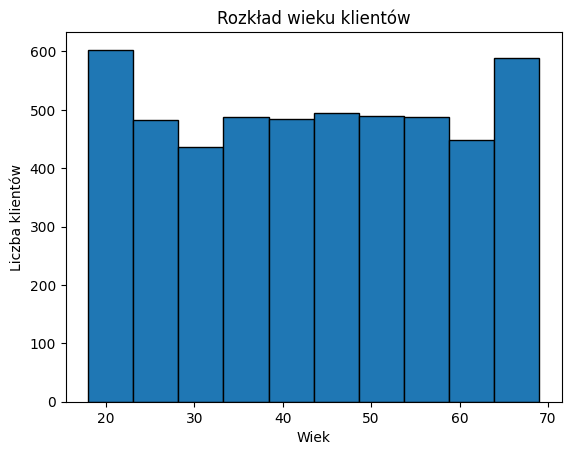

In [35]:


plt.hist(customers['age'], bins=10, edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.title('Rozkład wieku klientów')
plt.show()


<Axes: title={'center': 'Średnia wartość transakcji w miesiącach'}, xlabel='purchase_date'>

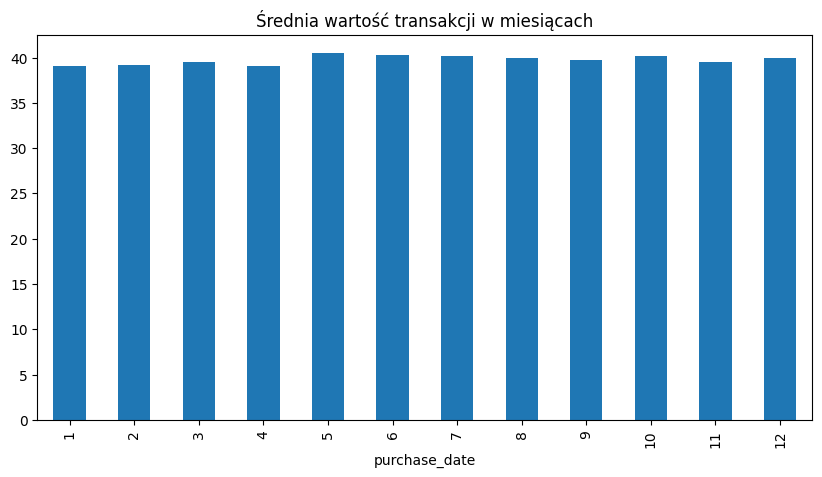

In [36]:
avg_sales_per_month = merged_df.groupby(merged_df['purchase_date'].dt.month)['total_sales'].mean()
avg_sales_per_month.plot(kind='bar', figsize=(10,5), title='Średnia wartość transakcji w miesiącach')


In [37]:
popular_category_by_gender = merged_df.groupby(['gender', 'category'])['transaction_id'].count().reset_index()
popular_category_by_gender = popular_category_by_gender.loc[popular_category_by_gender.groupby('gender')['transaction_id'].idxmax()]
popular_category_by_gender


,gender,category,transaction_id
0,Female,Alkohol,4459
8,Male,Alkohol,3533


In [38]:
avg_products_per_transaction = merged_df.groupby('transaction_id')['product_id'].nunique().mean()
avg_products_per_transaction


1.0

In [39]:
customer_loyalty = merged_df.groupby('customer_id').agg({'transaction_id': 'count', 'total_sales': 'sum'})
customer_loyalty.corr()


,transaction_id,total_sales
transaction_id,1.000000,0.797203
total_sales,0.797203,1.000000


In [40]:
sales_per_day = merged_df.groupby(merged_df['purchase_date'].dt.day_name())['total_sales'].sum().sort_values(ascending=False)
sales_per_day


purchase_date
Tuesday      289503.69
Saturday     289140.25
Monday       287693.54
Thursday     286248.49
Sunday       281060.31
Wednesday    280170.48
Friday       273827.27
Name: total_sales, dtype: float64

In [41]:
sales_pivot = merged_df.pivot_table(index='city', columns='category', values='total_sales', aggfunc='sum')
sales_pivot


category,Alkohol,Mrożonki,Nabiał,Napoje,Pieczywo,Produkty świeże,Przekąski,Słodycze
city,,,,,,,,
Gdańsk,53383.60,27749.41,34556.67,46102.47,31343.69,39737.98,30521.21,51963.81
Kraków,59256.07,36052.78,39129.81,57157.97,38427.99,46424.72,37243.81,61913.47
Poznań,49043.08,28576.19,35432.98,44502.42,30513.69,39341.86,30329.30,49825.36
Warszawa,97935.90,57226.36,59565.21,88379.87,55214.42,73257.16,59373.24,98144.49
Wrocław,65199.87,37368.71,44768.73,61436.06,38009.86,49398.13,38614.81,65220.87


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


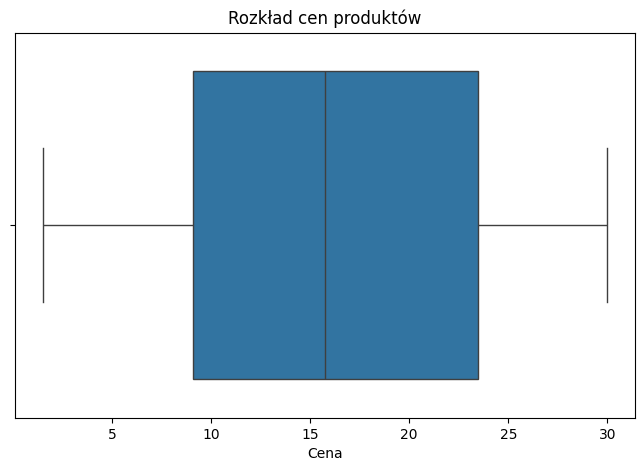

In [42]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=products['price'])
plt.title('Rozkład cen produktów')
plt.xlabel('Cena')
plt.show()


In [43]:
merged_df['quarter'] = merged_df['purchase_date'].dt.to_period('Q')
customers_per_quarter = merged_df.groupby('quarter')['customer_id'].nunique()
customers_per_quarter


quarter
2024Q1    4615
2024Q2    4559
2024Q3    4612
2024Q4    4603
Freq: Q-DEC, Name: customer_id, dtype: int64

In [44]:
last_purchase = merged_df.groupby('customer_id')['purchase_date'].max()
days_since_last = (pd.Timestamp('2025-01-01') - last_purchase).dt.days
days_since_last.head()


customer_id
1    11
2     5
3    29
4    65
5    68
Name: purchase_date, dtype: int64

In [45]:
one_time_buyers = merged_df.groupby('customer_id')['transaction_id'].nunique()
one_time_buyers = (one_time_buyers == 1).sum()
one_time_buyers


2

In [46]:
months_per_customer = merged_df.groupby('customer_id')['purchase_date'].apply(lambda x: x.dt.month.nunique())
active_customers = (months_per_customer >= 3).sum()
active_customers


4981

In [47]:
bins = [17, 25, 35, 50, 70]
labels = ['18-25', '26-35', '36-50', '51-70']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)
sales_by_age_group = merged_df.groupby('age_group')['total_sales'].sum()
sales_by_age_group


C:\Users\USER\AppData\Local\Temp\ipykernel_1768\2771851116.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_group = merged_df.groupby('age_group')['total_sales'].sum()


age_group
18-25    321792.44
26-35    354661.44
36-50    591941.19
51-70    719248.96
Name: total_sales, dtype: float64